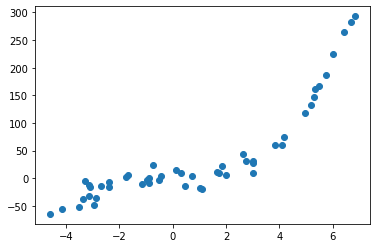

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

rng = np.random.RandomState(2020)
x = 12 * rng.rand(50) - 5
y = x**3 + 15 * rng.randn(50)
plt.scatter (x,y)

In [ ]:
X = x[:, np.newaxis]
X1, X2, y1, y2 = train_test_split(X, y, random_state=2020, train_size=0.7)

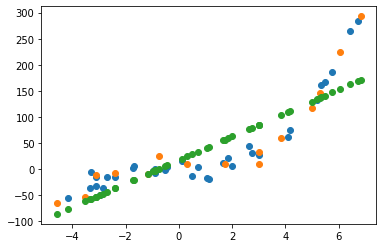

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
## Dados de treino
model.fit(X1, y1)
outcome = model.predict(X)

plt.scatter(X1, y1) ## Dados de treino
plt.scatter(X2, y2) ## Dados de teste
plt.scatter(X, outcome)

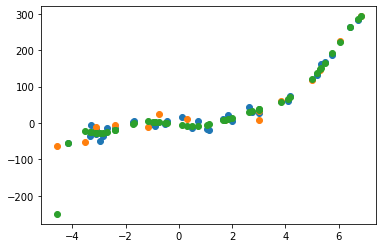

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)
polyX1 = poly.fit_transform(X1)

model_poly = LinearRegression(fit_intercept=True)
model_poly.fit(polyX1, y1)

polyX = poly.fit_transform(X)
poly_outcome = model_poly.predict(polyX)

plt.scatter(X1, y1) ## Dados de treino
plt.scatter(X2, y2) ## Dados de teste
plt.scatter(X, poly_outcome)

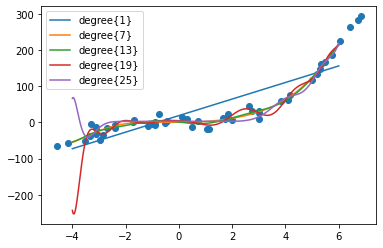

In [ ]:
plt.scatter(X, y)

X_test = np.linspace(-4, 6, 500)[:, np.newaxis]

for degree in range(1, 30, 6):
  poly = PolynomialFeatures(degree=degree)
  poly_X = poly.fit_transform(X)

  modelPoly = LinearRegression(fit_intercept=True)
  modelPoly.fit(poly_X, y)

  poly_X_test = poly.fit_transform(X_test)
  polyOutcome = modelPoly.predict(poly_X_test)

  plt.plot(X_test, polyOutcome, label='degree{%i}' % degree)
  plt.legend(loc='best')

(0.0, 1.0)

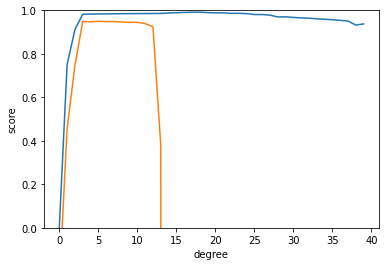

In [ ]:
from sklearn.pipeline import make_pipeline

def polynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

from sklearn.model_selection import validation_curve
degree = np.arange(0, 40)

train_score, val_score = validation_curve(polynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=5)

plt.plot(degree, np.mean(train_score, 1))
plt.plot(degree, np.mean(val_score, 1))

plt.xlabel('degree')
plt.ylabel('score')

plt.ylim(0, 1)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'polynomialfeatures__degree' : np.arange(1, 21),
    'linearregression__fit_intercept' : [True, False],
    'linearregression__normalize' : [True, False]
}

grid = GridSearchCV(polynomialRegression(), param_grid, cv=5)
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearre

In [ ]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 5}

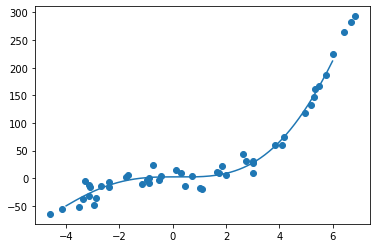

In [ ]:
model = grid.best_estimator_

plt.scatter(X, y)

y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test, y_test)

In [ ]:
#Parte 1: colocar o notebook no Github, link para o banco de dados
#Parte 2: apresentação ao acaso, explicação do banco de dados (parem quando gerar o cross_validation) de 10 a 15 minutos